# **Phishing Email Classification Project**
### **By Jharana Adhikari (C0927442)**

## **Dataset Source**
This project utilizes the [**Phishing Email Dataset**](https://www.kaggle.com/datasets/naserabdullahalam/phishing-email-dataset) from Kaggle.

## **Project Overview**
The objective of this project is to develop a machine learning pipeline to classify emails as **phishing or safe** using natural language processing (NLP) techniques. The key steps include:

1. **Text Preprocessing & Feature Extraction:**
   - Clean and tokenize email text.
   - Convert text into numerical features using TF-IDF or word embeddings.

2. **Classification Model:**
   - Train and evaluate a **Naïve Bayes classifier** for phishing email detection.

3. **Data Visualization:**
   - Generate **word clouds** to compare common terms in phishing vs. safe emails.

4. **Topic Modeling:**
   - Apply **Latent Dirichlet Allocation (LDA)** and **Non-Negative Matrix Factorization (NMF)** to identify hidden topics in emails.

This project aims to enhance phishing email detection by leveraging NLP and machineearning techniques. 🚀


In [2]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.decomposition import LatentDirichletAllocation, NMF
from sklearn.metrics import silhouette_score

In [3]:
# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yoga1st\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\yoga1st\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [4]:
 df = pd.read_csv('Phishing_Email.csv')

In [5]:
df.head()

,Unnamed: 0,Email Text,Email Type
0,0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,1,the other side of * galicismos * * galicismo *...,Safe Email
2,2,re : equistar deal tickets are you still avail...,Safe Email
3,3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,4,software at incredibly low prices ( 86 % lower...,Phishing Email


In [6]:
df.shape

(18650, 3)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18650 entries, 0 to 18649
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  18650 non-null  int64 
 1   Email Text  18634 non-null  object
 2   Email Type  18650 non-null  object
dtypes: int64(1), object(2)
memory usage: 437.2+ KB


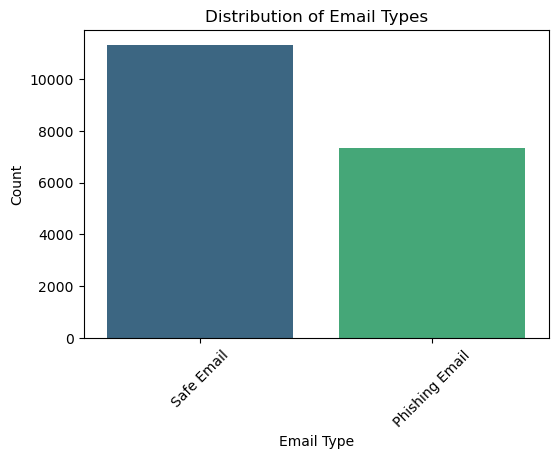

In [8]:
# Bar chart for email type distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Email Type', data=df, palette='viridis')
plt.xlabel("Email Type")
plt.ylabel("Count")
plt.title("Distribution of Email Types")
plt.xticks(rotation=45)
plt.show()


## **Key Takeaways from the Analysis**

### **Email Type Distribution**
- The dataset is **imbalanced**, with more **safe emails** than phishing emails.
- This imbalance may impact model performance, particularly in detecting phishing emails.

In [9]:
# Text Cleaning Function
def clean_text(text):
    if isinstance(text, str):
        text = text.lower()
        text = re.sub(r'[^a-zA-Z\s]', '', text)
        return text
    return ''

df['cleaned_text'] = df['Email Text'].apply(clean_text)


In [10]:
# Handle missing values
def handle_missing_values(df):
    df = df.dropna(subset=['Email Type', 'cleaned_text'])
    df['Email Type'] = df['Email Type'].str.strip()
    return df

df = handle_missing_values(df)

In [11]:
# Encode Labels
def encode_labels(df):
    label_mapping = {'Phishing Email': 1, 'Safe Email': 0}
    df['Email Label'] = df['Email Type'].map(label_mapping)
    return df

df = encode_labels(df)

In [12]:
# Feature Extraction
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['cleaned_text'])
y = df['Email Label']

In [13]:
# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Train Model
model = MultinomialNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

Accuracy: 0.9270777479892761
Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94      2273
           1       1.00      0.82      0.90      1457

    accuracy                           0.93      3730
   macro avg       0.95      0.91      0.92      3730
weighted avg       0.93      0.93      0.93      3730



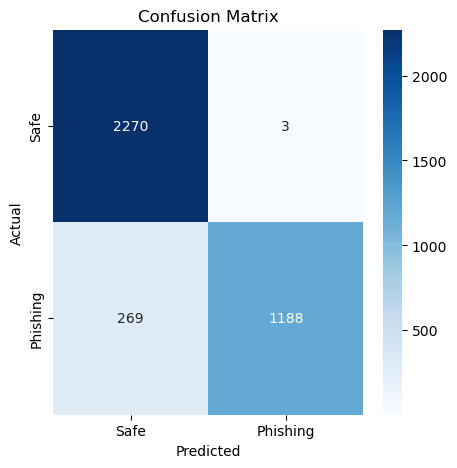

In [15]:
# Evaluation
def evaluate_model(y_test, y_pred):
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    plt.figure(figsize=(5, 5))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['Safe', 'Phishing'], yticklabels=['Safe', 'Phishing'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

evaluate_model(y_test, y_pred)

## **Key Takeaways from the Analysis**

### **Model Performance**
#### **Accuracy**
- The model achieved **92.7% accuracy**, indicating strong overall performance.

#### **Precision**
- **Safe Emails (0):** **89%** (some phishing emails were misclassified as safe).
- **Phishing Emails (1):** **100%** (all predicted phishing emails were correct).

#### **Recall**
- **Safe Emails (0):** **100%** (almost all safe emails were correctly identified).
- **Phishing Emails (1):** **82%** (some phishing emails were misclassified as safe).

#### **Confusion Matrix Insights**
- **Correct Predictions:**
  - **2270** safe emails were classified correctly.
  - **1188** phishing emails were classified correctly.
- **Misclassifications:**
  - **269** phishing emails were misclassified as safe.
  - **3** safe emails were misclassified as phishing.

### **Areas for Improvement**
- **Recall for Phishing Emails Needs Improvement**: **269 phishing emails** were misclassified as safe.
- **Possible Solutions:**
  - Use **oversampling (SMOTE)** or **class-weight adjustments** to handle the class imbalance.
  - Experiment with more **complex models** like **Random Forest, XGBoost, or BERT** for improved phishing detection.


In [16]:
# Word Cloud Visualization
def plot_wordcloud(text_data, title):
    wordcloud = WordCloud(background_color='white', max_words=100).generate(' '.join(text_data))
    plt.figure(figsize=(8, 4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(title)
    plt.show()

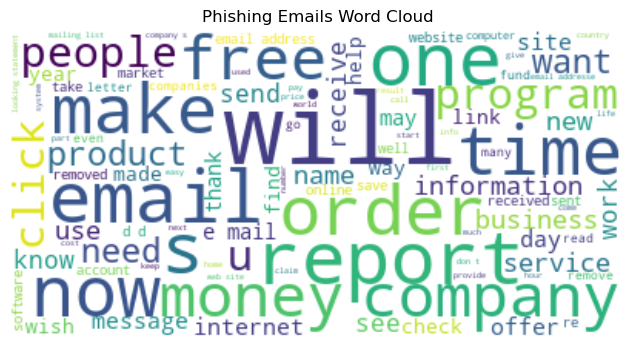

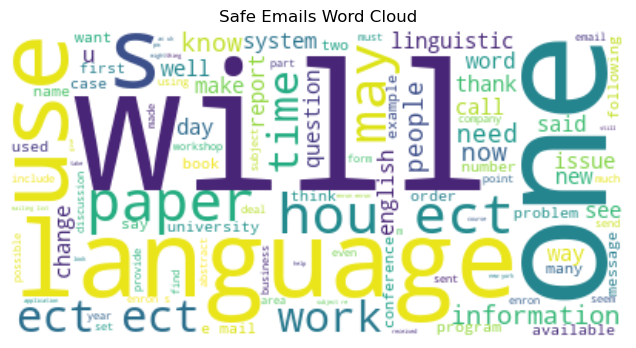

In [17]:
# Generate Word Clouds
phishing_texts = df[df['Email Label'] == 1]['cleaned_text']
safe_texts = df[df['Email Label'] == 0]['cleaned_text']
plot_wordcloud(phishing_texts, "Phishing Emails Word Cloud")
plot_wordcloud(safe_texts, "Safe Emails Word Cloud")

## **Key Takeaways from the analysis**

### **Word Cloud Insights**
#### **Phishing Emails:**
- Frequent words: **"free," "click," "money," "order," "report," "company," "email," "service."**
- Common phishing tactics: 
  - Financial transactions and urgency (e.g., "money," "order").
  - Suspicious prompts like "click" and "free."

#### **Safe Emails:**
- Frequent words: **"language," "paper," "use," "work," "time," "information," "people."**
- Topics indicate academic and work-related discussions.


In [18]:
# Topic Modeling - LDA & NMF
def print_topics(model, feature_names, n_top_words=10):
    topics = []
    for topic_idx, topic in enumerate(model.components_):
        topic_words = [feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
        topics.append(" ".join(topic_words))
    return topics

lda_model = LatentDirichletAllocation(n_components=5, random_state=42)
lda_model.fit(X)
nmf_model = NMF(n_components=5, random_state=42)
nmf_model.fit(X)

feature_names = vectorizer.get_feature_names_out()

In [19]:
# Print LDA & NMF Topics
print("\nLDA Topics:")
lda_topics = print_topics(lda_model, feature_names)
for i, topic in enumerate(lda_topics):
    print(f"Topic {i + 1}: {topic}")

print("\nNMF Topics:")
nmf_topics = print_topics(nmf_model, feature_names)
for i, topic in enumerate(nmf_topics):
    print(f"Topic {i + 1}: {topic}")


LDA Topics:
Topic 1: xls adobe rolex hplno computron nom hpl hplo tabs attached
Topic 2: rpmlist httplistsfreshrpmsnetmailmanlistinforpmlist rpm matthias saou url apt httpwwwnewsisfreecomclick rpms improvement
Topic 3: enron ect email com list information new free click time
Topic 4: perl preferences pudge tu httpuseperlorgarticleplsid la des httpuseperlorgmymessagesyou en les
Topic 5: hourahead schedules hour date start variances detected ancillary westdesk txt

NMF Topics:
Topic 1: email free list click money just business information time make
Topic 2: ect hou vince cc enron pm subject kaminski lon forwarded
Topic 3: hourahead schedules hour start date variances detected ancillary westdesk txt
Topic 4: enron hpl com gas vince xls teco corp attached energy
Topic 5: university language linguistics conference papers edu languages english workshop research


In [20]:
# Compare Models
lda_log_likelihood = lda_model.score(X)
nmf_reconstruction_error = nmf_model.reconstruction_err_
lda_silhouette = silhouette_score(X, lda_model.transform(X).argmax(axis=1))
nmf_silhouette = silhouette_score(X, nmf_model.transform(X).argmax(axis=1))

print(f"LDA Log-Likelihood: {lda_log_likelihood}")
print(f"NMF Reconstruction Error: {nmf_reconstruction_error}")
print(f"LDA Silhouette Score: {lda_silhouette}")
print(f"NMF Silhouette Score: {nmf_silhouette}")

LDA Log-Likelihood: -1437873.6351856817
NMF Reconstruction Error: 131.72962926464655
LDA Silhouette Score: -0.12451302167784116
NMF Silhouette Score: 0.014145449118132638


## **Topic Modeling Insights**
### **LDA Topics:**
- Some topics contain phishing-related words (e.g., "free," "click," "money").
- Other topics focus on legitimate work discussions.
- **Log-Likelihood:** `-1,437,873.63` (lower likelihood of well-separated topics).
- **Silhouette Score:** `-0.1245` (poor topic cohesion).

### **NMF Topics:**
- Topics clearly highlight phishing (e.g., "free," "click," "money") and legitimate content (e.g., "linguistics," "schedules").
- **Reconstruction Error:** `131.73` (better topic separability than LDA).
- **Silhouette Score:** `0.0141` (slightly better than LDA but still weak).

---

## **Model Performance Comparison**
- **LDA:** Weak topic separation (negative silhouette score).
- **NMF:** Slightly better separation and lower reconstruction error.
- **Overall, NMF performs better for phishing detection.**